# **Import**

In [ ]:
import pandas as pd
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report


# Load the IMDB dataset
df = pd.read_csv("IMDB Dataset.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **PRE**-**PROCESSING**

In [ ]:
def preprocess(text):
    # Remove non-alphabetical characters
    text = text.lower()
    text = ''.join([c for c in text if c in string.ascii_lowercase or c.isspace()])

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Pre-process the training and testing sets
df['review'] = df['review'].apply(preprocess)

In [ ]:
df

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary schools n...,negative
49998,im going disagree previous comment side maltin...,negative


# **Analysing**

In [ ]:
# Create a list of all the words in the training set
words = []
for text in df['review']:
    words.extend(text.split())

# Calculate some linguistic features
num_words = len(words)
num_unique_words = len(set(words))
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)

# Print the results
print(f"Number of words: {num_words}")
print(f"Number of unique words: {num_unique_words}")
print(f"Most common words: {most_common_words}")

Number of words: 6077968
Number of unique words: 175749
Most common words: [('br', 114890), ('movie', 83523), ('film', 74459), ('one', 51028), ('like', 38992), ('good', 28570), ('even', 24576), ('would', 24024), ('time', 23269), ('really', 22951), ('see', 22535), ('story', 22097), ('much', 18947), ('well', 18798), ('get', 18205), ('great', 17821), ('also', 17818), ('bad', 17719), ('people', 17538), ('first', 17155)]


#MLPClassifier

In [ ]:
X = df['review']
y = df['sentiment']

In [ ]:
X

0        one reviewers mentioned watching oz episode yo...
1        wonderful little production br br filming tech...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object

In [ ]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

#TD-IDF

In [ ]:
# Convert the reviews to numerical
# features using a TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
print(X.shape)

(50000, 175731)


In [ ]:
print(X)

  (0, 140360)	0.04709107508941444
  (0, 36329)	0.07312623356337325
  (0, 158435)	0.05712159462754396
  (0, 166526)	0.1249552738079699
  (0, 162325)	0.07050962775076966
  (0, 29711)	0.07216761958343103
  (0, 13038)	0.0444675177024648
  (0, 94911)	0.036487863120386904
  (0, 51052)	0.048020574485451245
  (0, 141642)	0.06420613391975384
  (0, 148649)	0.054886254706700485
  (0, 85161)	0.048050339326616176
  (0, 15387)	0.0996726635691873
  (0, 160790)	0.04935743800492976
  (0, 27662)	0.052976531190353914
  (0, 97407)	0.051091940271439776
  (0, 93227)	0.08733495314216698
  (0, 169495)	0.025773602091610025
  (0, 10087)	0.037967097714570915
  (0, 61442)	0.052268816278460715
  (0, 110517)	0.04931065907624953
  (0, 83208)	0.04746953420505301
  (0, 76712)	0.1679148067823794
  (0, 105211)	0.10806408155328516
  (0, 143691)	0.06922119858051072
  :	:
  (49999, 146753)	0.09901199126999902
  (49999, 101482)	0.1933285482256133
  (49999, 172910)	0.08778853716527618
  (49999, 22396)	0.07814917904236406
  (

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of data points in each set
print(f'Number of training data points: {X_train.shape[0]}')
print(f'Number of test data points: {X_test.shape[0]}')
print(f'Number of training labels: {y_train.shape[0]}')
print(f'Number of test labels: {y_test.shape[0]}')

Number of training data points: 40000
Number of test data points: 10000
Number of training labels: 40000
Number of test labels: 10000


#For plotting report

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # print matrix
    print("Confusion Matrix")
    print(cm)

    # Create a figure and a subplot
    fig, ax = plt.subplots()

    # Create a heatmap from the confusion matrix
    cax = ax.imshow(cm, cmap='Blues')

    # Add labels to the plot
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['negative', 'positive'])
    ax.yaxis.set_ticklabels(['negative', 'positive'])

    # Add a colorbar
    fig.colorbar(cax)


#RandomForest

In [ ]:
# Create a RandomForestClassifier object
clf_rdf = RandomForestClassifier(
    # Set the number of decision trees in the forest to 100
    n_estimators=100,
    # Set the maximum depth of each tree to 20
    max_depth=20,
    # Set the random seed to 0 for reproducibility
    random_state=0,
    # Suppress output during training
    verbose=False
)

# Fit the classifier to the training data and labels
clf_rdf_hdl = clf_rdf.fit(X_train, y_train)

In [ ]:
# Use the classifier's predict method to make predictions
# on the test data
y_pre = clf_rdf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

    negative       0.85      0.81      0.83      4961
    positive       0.82      0.86      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Confusion Matrix
[[4043  918]
 [ 715 4324]]


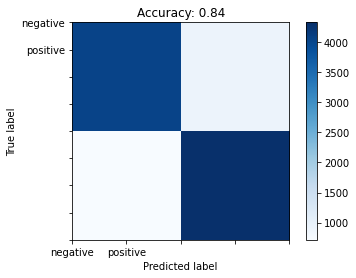

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the accuracy of the model
accuracy = clf_rdf_hdl.score(X_test, y_test)

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pre)

# Add the accuracy to the plot
plt.title(f'Accuracy: {accuracy:.2f}')

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_rdf_hdl,X, y, cv=5)
print("Accuracy(using cross_val_score:) %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy(using cross_val_score:) 0.84 (+/- 0.01)


#SVM

In [ ]:
# Import the SVC class from the sklearn.svm module
from sklearn.svm import SVC

# Create an SVC object
clf_svm = SVC(
    # Use the default value for gamma, which will be
    # 1 / n_features
    gamma='auto',
    # Enable output during training
    verbose=True
)

# Fit the SVC object to the training data and labels
clf_svm_hdl = clf_svm.fit(X_train, y_train)

[LibSVM]

In [ ]:
# Use the classifier's predict method to make predictions
# on the test data
y_pre = clf_svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

    negative       0.50      1.00      0.66      4961
    positive       0.00      0.00      0.00      5039

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
[[4961    0]
 [5039    0]]


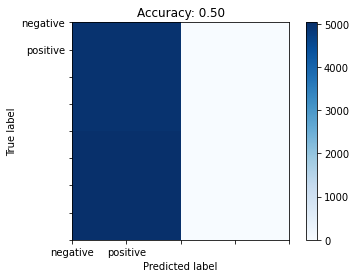

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the accuracy of the model
accuracy = clf_svm_hdl.score(X_test, y_test)

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pre)

# Add the accuracy to the plot
plt.title(f'Accuracy: {accuracy:.2f}')

# Show the plot
plt.show()

In [ ]:
scores = cross_val_score(clf_svm_hdl,X, y, cv=5)
print("Accuracy(using cross_val_score): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Accuracy(using cross_val_score): 0.62 (+/- 0.02)


#MLPClassification

In [ ]:
# Create an MLPClassifier object
clf_MLP = MLPClassifier(
    # Use the lbfgs solver
    solver='lbfgs',
    # Suppress output during training
    verbose=False
)

# Fit the MLPClassifier object to the training data and labels
clf_MLP_hdl = clf_MLP.fit(X_train, y_train)

In [ ]:
# Use the classifier's predict method to make predictions
# on the test data
y_pre = clf_MLP.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

    negative       0.88      0.88      0.88      4961
    positive       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Confusion Matrix
[[4343  618]
 [ 566 4473]]


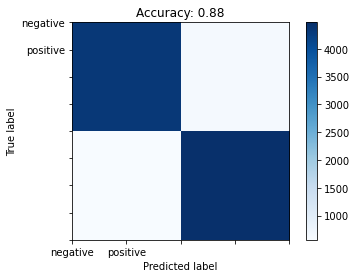

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the accuracy of the model
accuracy = clf_MLP_hdl.score(X_test, y_test)

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pre)

# Add the accuracy to the plot
plt.title(f'Accuracy: {accuracy:.2f}')

# Show the plot
plt.show()

In [ ]:
scores = cross_val_score(clf_MLP_hdl,X, y, cv=5)
print("Accuracy (using cross_val_score): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy (using cross_val_score): 0.88 (+/- 0.00)
